<a href="https://colab.research.google.com/github/Blantranderozari/Blantranderozari/blob/main/Chap03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3: Visualization with Statistical Graph
The topics that will be covered here are as follow:


1.   Picking the right plotting type for different tasks
2.   Improving and customizing visualization with advanced aesthetic customization
3.   Performing statistical plotting tailored for business queries
4.   Building stylish and professional plots for presentations or reports

We will use the birth and death rate of Texas\' counties group by urbanization level. Therefore:


*   Data: birth and death rate, which determines the location of the scattered points
*   Geometry: scatter plot
*   Aesthetic: size and the color of the spots

## Data preparation
Mount Google drive and read excel file

In [75]:
# Mount google drive
import os
from google.colab import drive
drive.mount("/content/drive/",force_remount=True)

# Read Excel file as Data Frame
import pandas as pd
print("pandas version:", pd.__version__)
df = pd.read_excel("drive/MyDrive/Colab Notebooks/PopulationEstimates2013.xlsx",skiprows=2)

Mounted at /content/drive/
pandas version: 1.3.5


In [76]:
# test if the gpu / tpu have gpu backend
import tensorflow as tf
tf.test.gpu_device_name()

''

## Picking the right plotting
Here we are going to explore the existing plotting type one by one

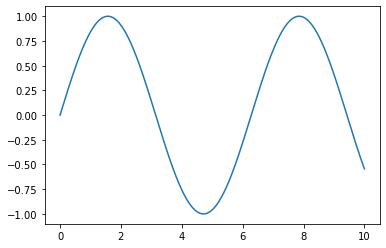

In [77]:
# Simple line plots
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
fig = plt.figure()
x = np.linspace(0,10,1000)
plt.plot(x, np.sin(x))

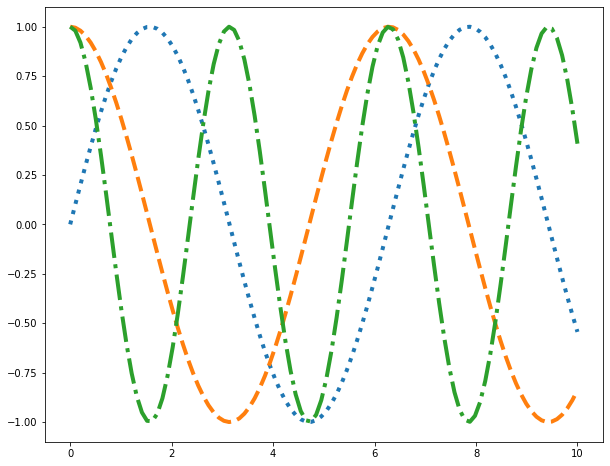

In [78]:
# Multiple line plots

fig=plt.figure(figsize=(10,8))
x = np.linspace(0,10,100)
plt.plot(x, np.sin(x),linestyle=':',linewidth=4)
plt.plot(x, np.cos(x),linestyle='--',linewidth=4)
plt.plot(x, np.cos(2*x), linestyle='-.',linewidth=4)

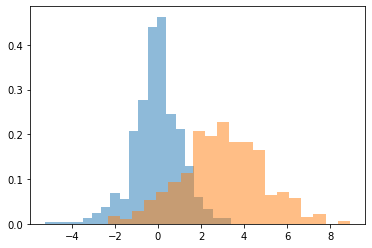

In [79]:
# Histogram plot
# Displaying two distributions: laplace and normal/gaussian
# density is normalized, so the histogram no longer shows frequency but probability count 
x1 = np.random.laplace(0, 0.8, 500)
x2 = np.random.normal(3, 2, 500)
plt.hist(x1, alpha=0.5, density=True, bins=20)
plt.hist(x2, alpha=0.5, density=True, bins=20);

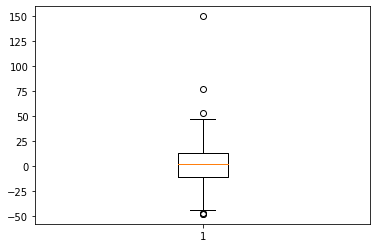

In [80]:
# Boxplot 
# give a good estimation of the existence of outliers
# Inter Quartile Range (IQR) = 3/4 quartile - 1/4 quartile
# maximum line = 3/4 quartile + (1.5 * IQR)
# minimum line = 1/4 quartile - (1.5 * IQR)
# In normal distribution, outlier has the probability roughly at 0.7%
import pandas as pd

df = pd.read_excel("drive/MyDrive/Colab Notebooks/PopulationEstimates2013.xlsx",skiprows=2)
dfTX = df[df['State']== 'TX'].tail(-1)
plt.boxplot(dfTX['R_NET_MIG_2017']);

Text(0.5, 1.0, 'Texas Counties Birth/Death rates')

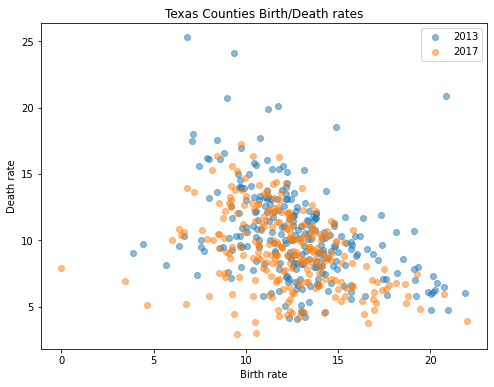

In [81]:
# Scatter plot
# Used to inspect the correlation between variables.
# It is helpful to display data at different time from different location
plt.figure(figsize=(8,6))
plt.scatter(dfTX.R_birth_2013,dfTX.R_death_2013, alpha=0.5,label='2013')
plt.scatter(dfTX.R_birth_2017,dfTX.R_death_2017, alpha=0.5,label='2017')
plt.legend()
plt.xlabel('Birth rate')
plt.ylabel('Death rate')
plt.title('Texas Counties Birth/Death rates')

Text(0.5, 1.0, 'Andersen County birth rate and death rate')

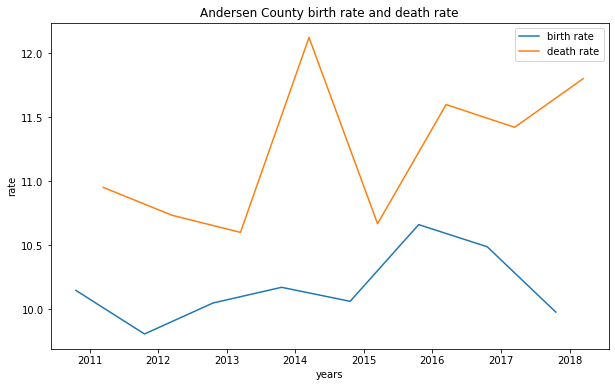

In [82]:
# Bar plots
# Used to demonstrate trends and compare several quantities side by side

# Data for Anderson County in Texas, birth and death rates from 2011 to 2018
birthRates = list(filter(lambda x: x.startswith('R_birth'),dfTX.columns))
deathRates = list(filter(lambda x: x.startswith('R_death'),dfTX.columns))
years = np.array(list(map(lambda x: int(x[-4:]),birthRates)))

# generate line plots
plt.figure(figsize=(10,6))
width=0.4
plt.plot(years-width/2, dfTX.iloc[0][birthRates],label='birth rate')
plt.plot(years+width/2, dfTX.iloc[0][deathRates], label='death rate')
plt.xlabel('years')
plt.ylabel('rate')
plt.legend()
plt.title('Andersen County birth rate and death rate')

Text(0.5, 1.0, 'Anderson County birth rate and death rate')

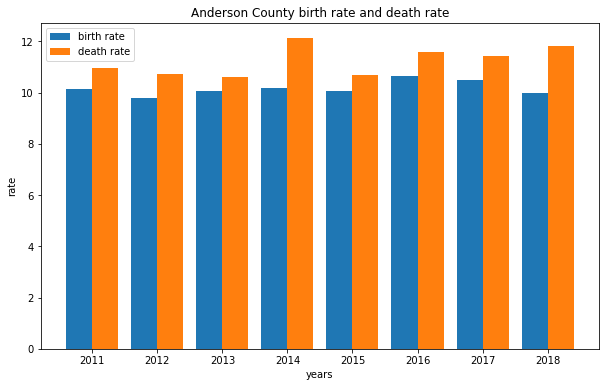

In [83]:
# generate bar plots
plt.figure(figsize=(10,6))
width = 0.4
plt.bar(years-width/2, dfTX.iloc[0][birthRates], width=width, label='birth rate', alpha=1)
plt.bar(years+width/2, dfTX.iloc[0][deathRates], width=width, label='death rate', alpha=1)
plt.xlabel('years')
plt.ylabel('rate')
plt.legend()
plt.title('Anderson County birth rate and death rate')

## Advanced Visualization Customization
We are going to learn how to customize the geometry and aesthetics.
First, customizing geometry. Let's say that you want to put the birth rate and population change on the
same plot. However due to scale of range between these two variables are drastically different, birth rate will look indistinguishable.

There are 2 ways to solve this i.e. axis-sharing or subplots, and scale change

### Example 1: Axis sharing and sub plots

In [84]:
#  Build features mask, by selecting row and column from TX population data
birthRates = list(filter(lambda x: x.startswith("R_birth"), dfTX.columns))
popChanges = list(filter(lambda x: x.startswith("N_POP_CHG"), dfTX.columns))
years = np.array(list(map(lambda x: int(x[-4:]), birthRates)))
#print(popChanges)
#print(years)

Text(0.5, 1.0, 'Andersen County birth rate and population change')

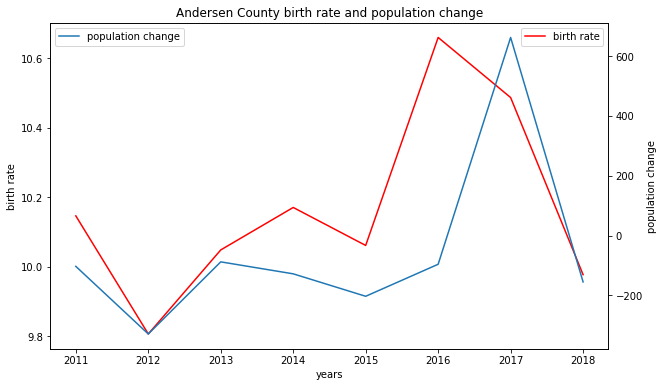

In [85]:
# Example 1A: Axis sharing 
# the Y axis on the left represent different scale from the one on the right

figure, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(years,dfTX.iloc[0][birthRates], label='birth rate', c='red')
ax2 = ax1.twinx()
ax2.plot(years,dfTX.iloc[0][popChanges][1:], label='population change')
ax1.set_xlabel('years')
ax1.set_ylabel('birth rate')
ax2.set_ylabel('population change')
ax1.legend()
ax2.legend()
plt.title('Andersen County birth rate and population change')

Text(0.5, 1.0, 'Anderson County birth rate and population change')

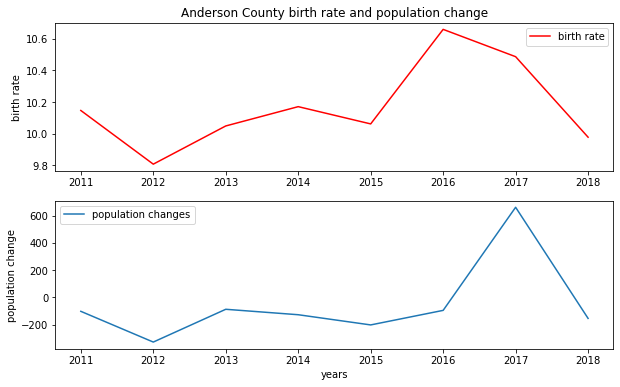

In [86]:
# Example 1B: sub plots
figure, axes = plt.subplots(2,1,figsize=(10,6))
axes[0].plot(years, dfTX.iloc[0][birthRates], label='birth rate', c='red')
axes[1].plot(years, dfTX.iloc[0][popChanges][1:], label='population changes')
axes[1].set_xlabel('years')
axes[0].set_ylabel('birth rate')
axes[1].set_ylabel('population change')
axes[0].legend()
axes[1].legend()
axes[0].set_title('Anderson County birth rate and population change')


### Example 2: Scale Change & customize the aesthetics

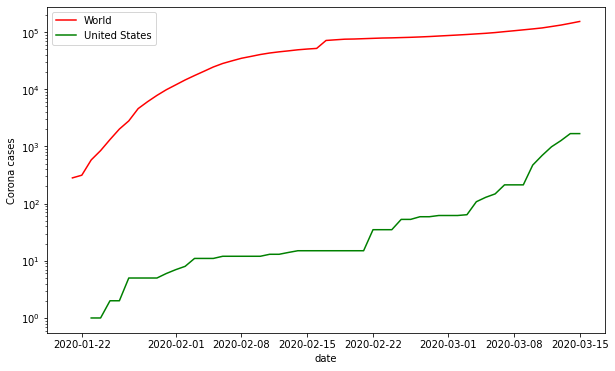

In [87]:
# Example 2A: Scale Change.
# We use data of coronavirus cases published by WHO
from datetime import datetime

coronaCases = pd.read_csv("drive/MyDrive/Colab Notebooks/total_cases_03_15_2020.csv")
coronaCases['date'] = coronaCases['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

dfWorld = coronaCases['World'].dropna()
dfWorld.tail()

plt.figure(figsize=(10,6))
plt.yscale('log')
plt.plot(coronaCases['date'],coronaCases['World'].dropna(),c='red',label='World')
plt.plot(coronaCases['date'],coronaCases['United States'], c='green', label='United States')
plt.xlabel('date')
plt.ylabel('Corona cases')
plt.legend()

Text(0.5, 1.0, 'Texas Counties birth/death rate in 2013')

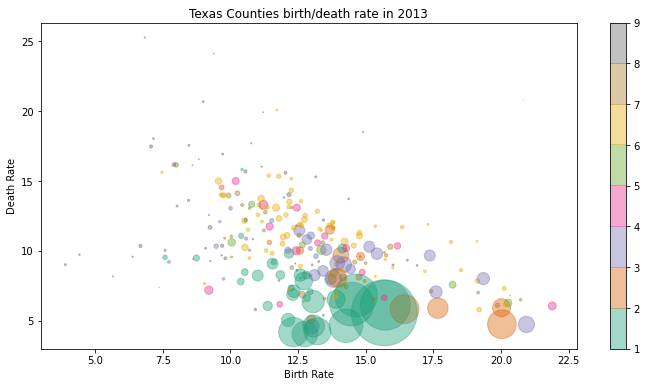

In [90]:
# Example 2B: Markers
plt.figure(figsize=(12,6))
plt.scatter(dfTX.R_birth_2013,dfTX.R_death_2013,alpha=0.4, 
            s=dfTX.POP_ESTIMATE_2013/1000, c=dfTX['Rural-urban_Continuum Code_2003'],
            cmap='Dark2')
plt.colorbar()
plt.xlabel('Birth Rate')
plt.ylabel('Death Rate')
plt.title('Texas Counties birth/death rate in 2013')




## Query-oriented statistical plotting

Two more examples. The first example is about preprocessing data to meet the requirement of the plotting API in *seaborn* library. In the second, we will integrate simple statistic analysis into plotting which will serve as a teaser for next chapter

Text(0.5, 1.0, 'Texas Counties birth rate from 2011 to 2018')

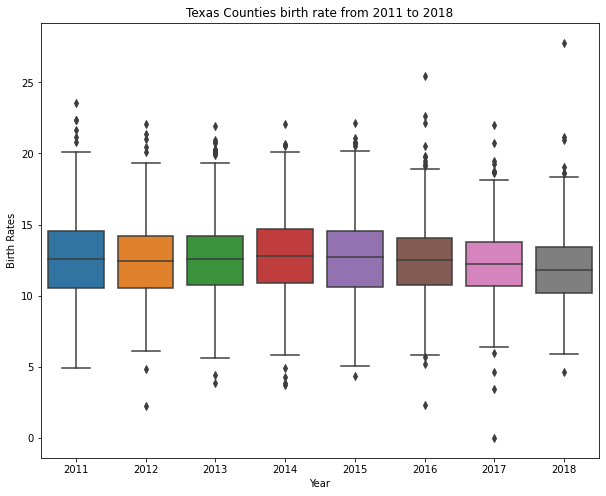

In [160]:
# Example 1: Preparing the data to fit the plotting function API
import seaborn as sns
#tips = sns.load_dataset('tips')
#tips.head()
#ax = sns.boxplot(x='day',y='total_bill',data=tips);

# Convert wide table to long table
# turn offf default='warn'
# refer to this link https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None

birthRatesDF = dfTX[birthRates]
birthRatesDF['index'] = birthRatesDF.index
birthRatesDFLong = pd.melt(birthRatesDF,id_vars=['index'],value_vars=birthRatesDF.columns[:-1])
birthRatesDFLong['variable'] = birthRatesDFLong['variable'].apply(lambda x: int(x[-4:]))

plt.figure(figsize=(10,8))
sns.boxplot(x='variable', y='value', data=birthRatesDFLong)
plt.xlabel('Year')
plt.ylabel('Birth Rates')
plt.title('Texas Counties birth rate from 2011 to 2018')

### Example 2: Combine Analysis with plain plotting
Suppose you want to examine to check is there are some correlations between birth rate and natural population increase in year 2017
Therefore, you need to do the following:


1.   Examine the distribution of each quantities
2.   Examine the correlation between these 2 quantities
3.   Obtain Mathematical visual reprentation of these two quantities

which can be done by *seaborn.jointplot()* function

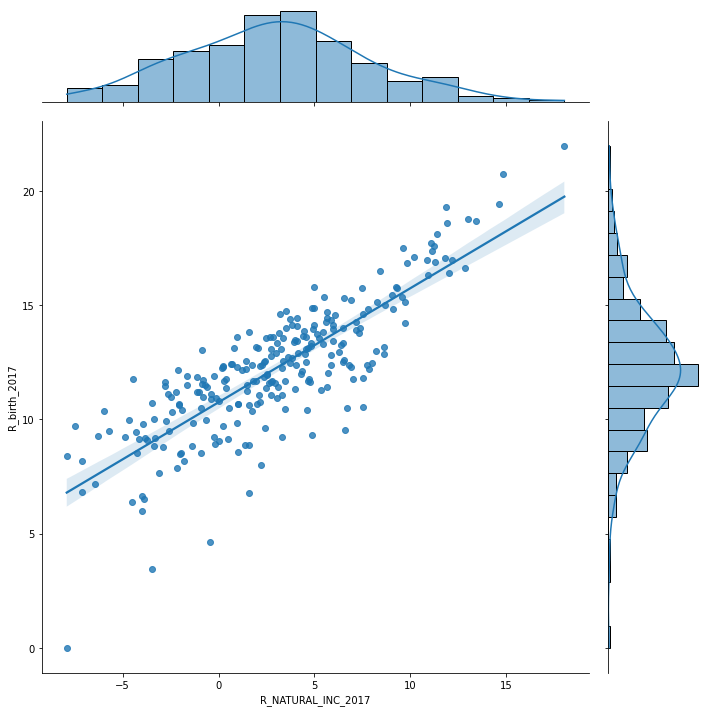

In [162]:
# Combine analysis with seaborn function
g= sns.jointplot(x='R_NATURAL_INC_2017',y='R_birth_2017',data=dfTX, kind='reg',height=10)

## Presentation-ready plotting tips
For example use grayscale style for your presentation

<Figure size 864x432 with 0 Axes>

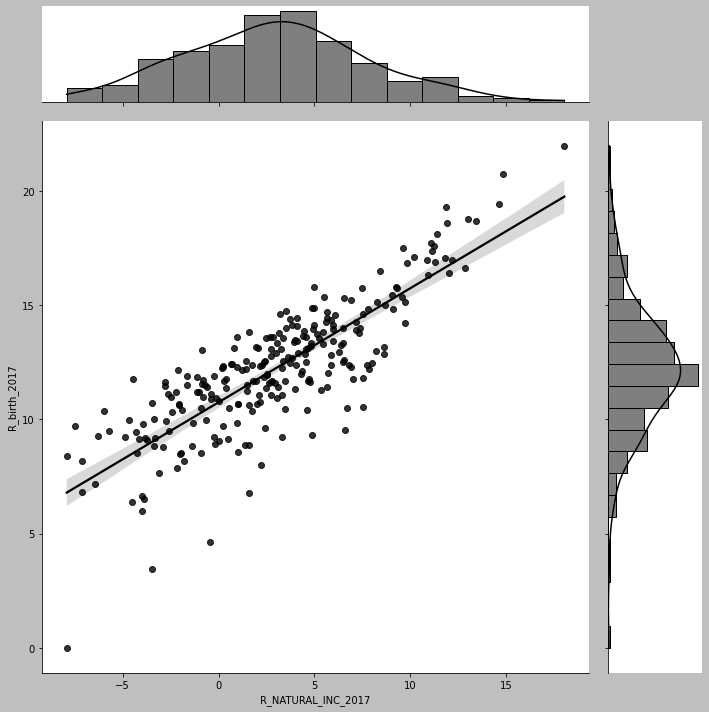

In [163]:
with plt.style.context('grayscale'):
  plt.figure(figsize=(12,6))
  g= sns.jointplot(x='R_NATURAL_INC_2017',y='R_birth_2017',data=dfTX, kind='reg',height=10)